**Merging transactions**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

'Only to be used if "all_tranformations.csv" does not exist.'

**Merging datagrames**

In [3]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df4 = pd.merge(df2, df3[df3.brand != "Unknown"], on='user_id')
data = pd.merge(df4, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [4]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [5]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'num_referrals'], axis=1)

**Column Tranformations**

In [6]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [7]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

In [8]:
currency_ = {'FAILED': 0, 'DECLINED': 0, 'COMPLETED': 1, 'REVERTED': 2, 'PENDING': 0, 'CANCELLED': 0}
data['transactions_state'] = data['transactions_state'].map(currency_)

In [9]:
brands = {"Android": 0,"Apple": 1}
data['brand'] = data['brand'].map(brands)

In [10]:
# SWEU --> south western eu
# EEU --> Eastern Europe
# CEU --> Central Europe
# SWEU --> South Western Europe
# WEU --> Western Europe
# NEU ---> Norhern Europe
# AS --> ASIA
# NA --> northamerica
# AF --> Africa
# OC --> Oceania

#(oceania,namerica,africa,SEU)
#(SWEU,CEU,NEU,EEU)
#(Western Europe)


continents_ = {'ES':'SWEU', 'LT':'EEU', 'IE':'WEU', 'GB':'WEU', 'MT':'SWEU', 'FR':'SWEU', 'RO':'SWEU', 'PL':'EEU', 'AT':'CEU', 'IT':'SWEU', 'SI':'CEU', 'CZ':'CEU', 'BE':'WEU', 'BG':'SWEU', 'GI':'SWEU', 'CH':'AS', 'GG':'SWEU', 'CY':'SWEU', 'DE':'CEU', 'SK':'CEU', 'GR':'SEU', 'DK':'NEU', 'PT':'SWEU', 'LU':'NEU', 'HR':'SWEU', 'NL':'NEU', 'SE':'NEU', 'LV':'EEU', 'IM':'NEU', 'FI':'NEU', 'EE':'EEU', 'JE':'SWEU', 'HU':'CEU', 'NO':'NEU', 'RE':'AF', 'IS':'NEU', 'GP':'NA', 'AU':'OC', 'LI':'EEU', 'MQ':'NA'}
data['user_country'] = data['user_country'].map(continents_)


#Appending new Continents
new_continents_ = {'OC':'rest_of_the_world','NA':'rest_of_the_world','AF':'rest_of_the_world','SEU':'rest_of_the_world','AS':'rest_of_the_world',
               'SWEU':'Central_Europe','CEU':'Central_Europe','NEU':'Central_Europe','EEU':'Central_Europe',
                 'WEU':'Western_Europe'}

data['user_country'] = data['user_country'].map(new_continents_)


# Renaming Column
data = data.rename(columns={"user_country": "continent"})

In [11]:
data = data[(data.transactions_state == 1) | (data.transactions_state == 2)]

In [12]:
data['continent'].value_counts()

Central_Europe       1024059
Western_Europe        918553
rest_of_the_world      49584
Name: continent, dtype: int64

In [13]:
data['continent'].isna().sum()

0

**Plots**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

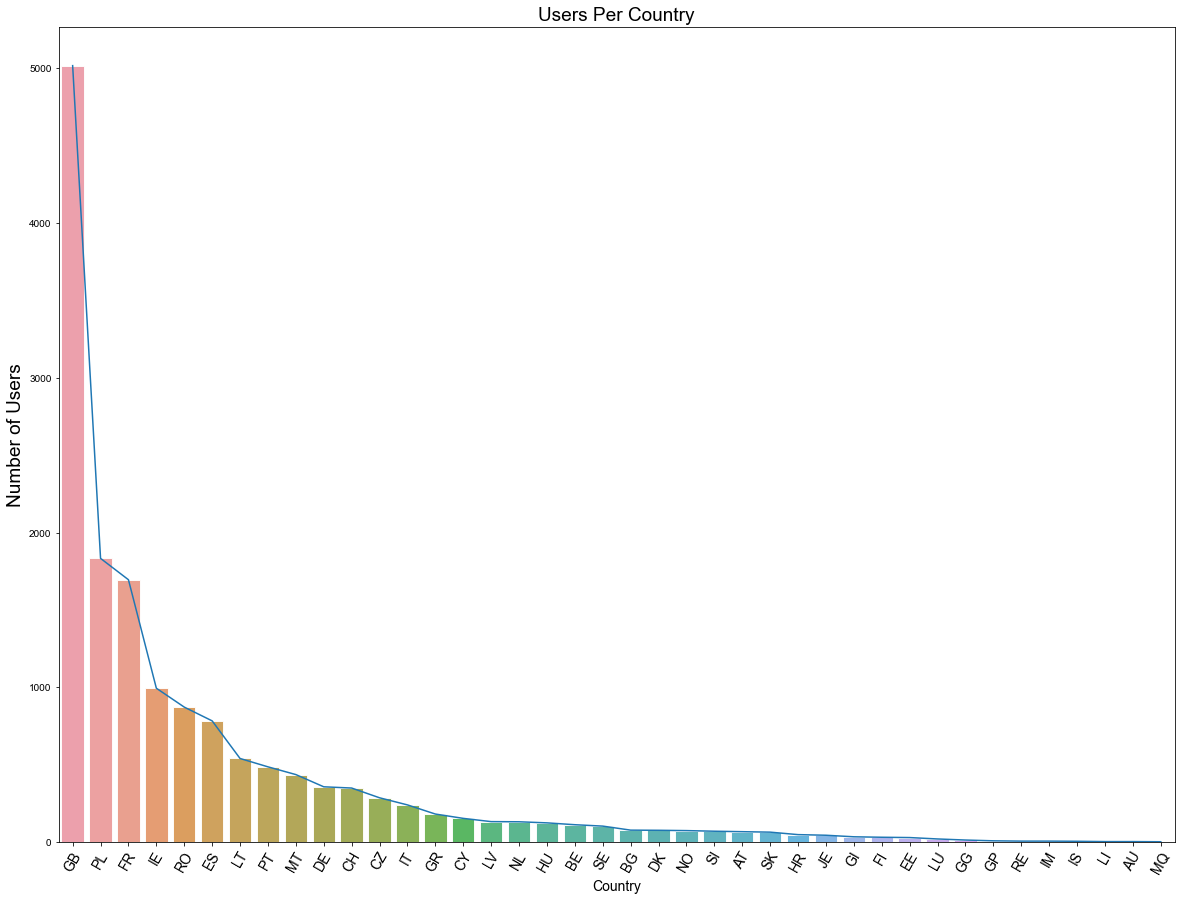

In [15]:
carrier_count = df2['country'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Users Per Country',fontsize=19)
plt.ylabel('Number of Users', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

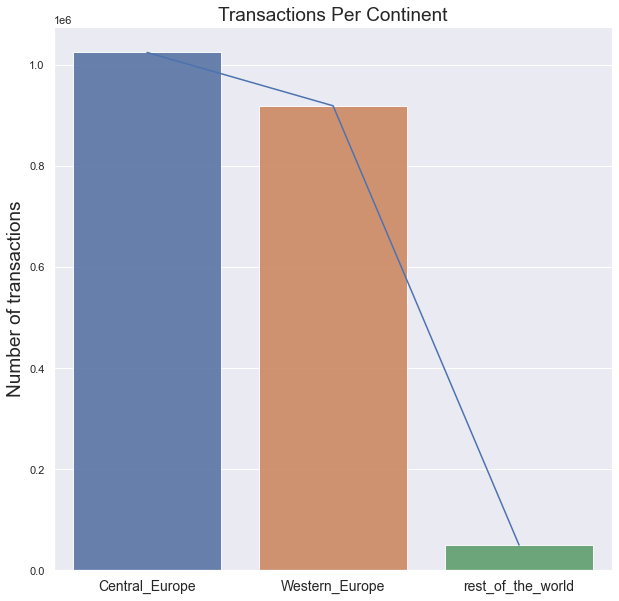

In [16]:
carrier_count = data['continent'].value_counts()
carrier_count.plot(figsize=(10,10))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Transactions Per Continent',fontsize=19)
plt.ylabel('Number of transactions', fontsize=19)
plt.xticks(fontsize=14)

plt.show()

**Aggregating**

In [17]:
def age_bands(year):
    year = 2020 - year
    if year < 25:
        return 0
    elif year < 35:
        return 1
    elif year < 45:
        return 2
    elif year < 55:
        return 3
    elif year < 65:
        return 4
    return 5

In [18]:
# Demographics
users_agg_df = data.groupby(['user_id']).agg({'birth_year': 'first', 'continent': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'}).reset_index()
users_agg_df["birth_year"] = users_agg_df["birth_year"].apply(lambda x: age_bands(x))
users_agg_df

,user_id,birth_year,continent,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
0,user_0,1,Central_Europe,2018-09-10 18:46:42.843855,0,0,3,1
1,user_1,2,Central_Europe,2018-01-11 18:53:10.531146,1,0,75,1
2,user_10,0,Central_Europe,2018-01-26 18:40:43.166413,1,0,19,1
3,user_100,1,Central_Europe,2018-12-02 14:18:09.034151,0,0,0,0
4,user_1000,1,Central_Europe,2018-03-22 22:08:56.267644,0,1,13,1
...,...,...,...,...,...,...,...,...
14902,user_9995,1,Central_Europe,2018-06-05 06:16:51.861843,0,0,0,1
14903,user_9996,4,Western_Europe,2018-10-26 03:59:55.030756,0,0,0,1
14904,user_9997,1,Western_Europe,2018-08-18 04:07:31.402857,0,0,6,0
14905,user_9998,1,Central_Europe,2019-01-02 02:17:00.962571,0,0,21,0


In [19]:
# First and last transaction of each user
first_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'min'}).reset_index().rename(columns={"transaction_created_date": "first_transaction_date"})
last_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'max'}).reset_index().rename(columns={"transaction_created_date": "last_transaction_date"})
transactions_date_agg = pd.merge(first_transactions_date_agg, last_transactions_date_agg, on="user_id")
transactions_date_agg

,user_id,first_transaction_date,last_transaction_date
0,user_0,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855
1,user_1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146
2,user_10,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413
3,user_100,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151
4,user_1000,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644
...,...,...,...
14902,user_9995,2018-06-16 19:51:44.248843,2019-05-01 12:21:34.372843
14903,user_9996,2018-10-26 04:02:43.183756,2019-01-08 05:59:32.103756
14904,user_9997,2018-08-18 04:15:20.234857,2019-04-27 00:32:53.447857
14905,user_9998,2019-01-02 02:23:38.707571,2019-03-15 09:27:13.108571


In [20]:
# Total transactions
user_transactions = data.groupby(["user_id"]).agg({'transaction_created_date': 'count'}).reset_index().rename(columns={"transaction_created_date": "n_transactions"})
user_transactions

,user_id,n_transactions
0,user_0,528
1,user_1,139
2,user_10,126
3,user_100,58
4,user_1000,43
...,...,...
14902,user_9995,6
14903,user_9996,32
14904,user_9997,136
14905,user_9998,31


In [21]:
# Total amounts of each user
transactions_total_agg = data[data.transactions_state == 1].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index()
transactions_total_agg = transactions_total_agg.rename(columns={"amount_usd": "amount_total"})
transactions_total_rev = data[data.transactions_state == 2].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index().rename(columns={'amount_usd': 'amount_reverted'})


transactions_total_agg = pd.merge(transactions_total_agg, transactions_total_rev, on="user_id", how="left").fillna(0.0)#converting NaN to 0

transactions_total_agg["total_amount"] = transactions_total_agg["amount_total"] - transactions_total_agg["amount_reverted"]
transactions_total_agg = transactions_total_agg[["user_id", "total_amount"]]
transactions_total_agg

,user_id,total_amount
0,user_0,6892.45
1,user_1,12953.66
2,user_10,5381.07
3,user_100,3716.07
4,user_1000,843.12
...,...,...
14784,user_9995,239.65
14785,user_9996,1680.76
14786,user_9997,4046.05
14787,user_9998,520.52


In [22]:
# Final df for classification
classification_df = pd.merge(users_agg_df, transactions_date_agg, on='user_id')
classification_df = pd.merge(classification_df, transactions_total_agg, on='user_id')
classification_df = pd.merge(classification_df, user_transactions, on='user_id')
dum = pd.get_dummies(classification_df.continent)
classification_df = pd.concat([classification_df, dum], axis=1)
classification_df['label'] = classification_df['plan']
classification_df = classification_df.drop(columns=['continent', 'plan']).rename(columns={'birth_year': 'age_band'})
classification_df

,user_id,age_band,user_created_date,user_settings_crypto_unlocked,num_contacts,brand,first_transaction_date,last_transaction_date,total_amount,n_transactions,Central_Europe,Western_Europe,rest_of_the_world,label
0,user_0,1,2018-09-10 18:46:42.843855,0,3,1,2018-09-10 18:51:20.218855,2019-05-10 05:09:13.868855,6892.45,528,1,0,0,0
1,user_1,2,2018-01-11 18:53:10.531146,1,75,1,2018-02-04 08:27:53.463146,2019-05-04 02:30:11.492146,12953.66,139,1,0,0,0
2,user_10,0,2018-01-26 18:40:43.166413,1,19,1,2018-06-29 15:37:38.050413,2019-05-11 13:07:42.624413,5381.07,126,1,0,0,0
3,user_100,1,2018-12-02 14:18:09.034151,0,0,0,2018-12-02 14:22:58.423151,2019-02-24 13:36:50.054151,3716.07,58,1,0,0,0
4,user_1000,1,2018-03-22 22:08:56.267644,0,13,1,2019-03-27 11:03:23.105644,2019-05-05 19:08:42.183644,843.12,43,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14784,user_9995,1,2018-06-05 06:16:51.861843,0,0,1,2018-06-16 19:51:44.248843,2019-05-01 12:21:34.372843,239.65,6,1,0,0,0
14785,user_9996,4,2018-10-26 03:59:55.030756,0,0,1,2018-10-26 04:02:43.183756,2019-01-08 05:59:32.103756,1680.76,32,0,1,0,0
14786,user_9997,1,2018-08-18 04:07:31.402857,0,6,0,2018-08-18 04:15:20.234857,2019-04-27 00:32:53.447857,4046.05,136,0,1,0,0
14787,user_9998,1,2019-01-02 02:17:00.962571,0,21,0,2019-01-02 02:23:38.707571,2019-03-15 09:27:13.108571,520.52,31,1,0,0,0


**Train/test splitting**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = classification_df[['age_band', 'user_settings_crypto_unlocked', 'num_contacts', 'brand', 'total_amount', 'n_transactions', 'Central_Europe', 'Central_Europe', 'rest_of_the_world']]
y = classification_df['label']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

**Scaling**

In [26]:
from sklearn.preprocessing import RobustScaler# For outliers

In [27]:
scaler = RobustScaler().fit(x_train)

In [28]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Balancing**

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
print(f'Number of users with plan 0 pre-balancing: {len(y_train[y_train == 0])} and with plan 1: {len(y_train[y_train == 1])}')

Number of users with plan 0 pre-balancing: 10912 and with plan 1: 919


In [31]:
sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

In [32]:
print(f'Number of users with plan 0 post-balancing: {len(y_train_res[y_train_res == 0])} and with plan 1: {len(y_train_res[y_train_res == 1])}')

Number of users with plan 0 post-balancing: 10912 and with plan 1: 10912


**Models**

In [ ]:
from ml import MLModels

In [80]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB,BernoulliNB


class MLModels(object):
    x_train = None
    x_test = None
    y_train = None
    y_test = None
    model = None
    parameters = None

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def grid_search(self):
        clf_ = GridSearchCV(
            self.model, param_grid=self.parameters, n_jobs=-1, scoring='recall'
        )
        clf_.fit(self.x_train, self.y_train)
        best_estimator = clf_.best_estimator_
        print(f"Best estimator recall: {clf_.best_score_}")
        y_pred_ = best_estimator.predict(self.x_test)
        print('Precision Score : ' + str(precision_score(self.y_test, y_pred_)))
        print(f'Recall Score : {recall_score(self.y_test, y_pred_)}')
        print(classification_report(self.y_test, y_pred_))
        print(confusion_matrix(self.y_test, y_pred_))

    def logistic_regression(self):
        self.model = LogisticRegression()
        self.parameters = [
            {
                'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            },
            {
                'solver': ['sag', 'lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            }
        ]

    def knn(self):
        self.model = KNeighborsClassifier()
        self.parameters = [
            {
                'n_neighbors': [3,9,15,21], 
                'leaf_size': [0,15,20,25,30],
                'p': [1,2],
                'algorithm': ['auto'],
                'weights':['uniform','distance']
            }
        ]
    def DecisionTree(self):
        self.model = DecisionTreeClassifier()
        self.parameters = [
            {
                'min_samples_leaf': [1,2,3,4], 
                
                'max_depth': [1,2,4,6],
                'ccp_alpha': [0.005,0.010,0.015,0.020,0.025],
                #'criterion': ['gini','entropy']
                
            }
        ]
        
    def Gaussian(self):
        self.model = GaussianNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]

        
    def Bernouli(self):
        self.model = BernoulliNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]
   

In [43]:
lr_model = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)
lr_model.logistic_regression()
lr_model.grid_search()

Best estimator recall: 0.7010610277819649
Precision Score : 0.2537764350453172
Recall Score : 0.7601809954751131
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2737
           1       0.25      0.76      0.38       221

    accuracy                           0.82      2958
   macro avg       0.62      0.79      0.64      2958
weighted avg       0.92      0.82      0.85      2958

[[2243  494]
 [  53  168]]


In [63]:
_neigh = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)
_neigh.knn()
_neigh.grid_search()

Best estimator recall: 0.9568373310469662
Precision Score : 0.22336065573770492
Recall Score : 0.49321266968325794
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      2737
           1       0.22      0.49      0.31       221

    accuracy                           0.83      2958
   macro avg       0.59      0.68      0.61      2958
weighted avg       0.90      0.83      0.86      2958

[[2358  379]
 [ 112  109]]


In [62]:
tree = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)
tree.DecisionTree()
tree.grid_search()

Best estimator recall: 0.8453069779686629
Precision Score : 0.16476774758983348
Recall Score : 0.8506787330316742
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2737
           1       0.16      0.85      0.28       221

    accuracy                           0.67      2958
   macro avg       0.57      0.75      0.53      2958
weighted avg       0.92      0.67      0.75      2958

[[1784  953]
 [  33  188]]


In [81]:
Gaussian = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)
Gaussian.Gaussian()
Gaussian.grid_search()


Best estimator recall: 0.4173381680706635
Precision Score : 0.390625
Recall Score : 0.45248868778280543
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2737
           1       0.39      0.45      0.42       221

    accuracy                           0.91      2958
   macro avg       0.67      0.70      0.68      2958
weighted avg       0.91      0.91      0.91      2958

[[2581  156]
 [ 121  100]]


In [82]:
Bernouli = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)
Bernouli.Bernouli()
Bernouli.grid_search()

Best estimator recall: 0.8165312495145178
Precision Score : 0.1589041095890411
Recall Score : 0.7873303167420814
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      2737
           1       0.16      0.79      0.26       221

    accuracy                           0.67      2958
   macro avg       0.57      0.73      0.53      2958
weighted avg       0.91      0.67      0.75      2958

[[1816  921]
 [  47  174]]


**Tests and raw code**

In [ ]:
len(data[(data.transactions_state == 2) & (data.direction=="INBOUND")])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['transactions_state'])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['direction'])

In [ ]:
pd.crosstab(index=data['direction'],columns=data['transactions_state'])

In [ ]:
data[(data.user_id == "user_7") & (data.transactions_state == 2) & (data.amount_usd == 8.51) & (data.direction == "INBOUND")]

In [ ]:
data[data["user_id"] == "user_12038"].sort_values(by='transaction_created_date', ascending=True)

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['ea_cardholderpresence'])

In [ ]:
data['num_contacts'].describe()

In [ ]:
data['ea_cardholderpresence'].value_counts()